In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
%matplotlib inline

In [55]:
data = pd.read_csv('Stars.csv')
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


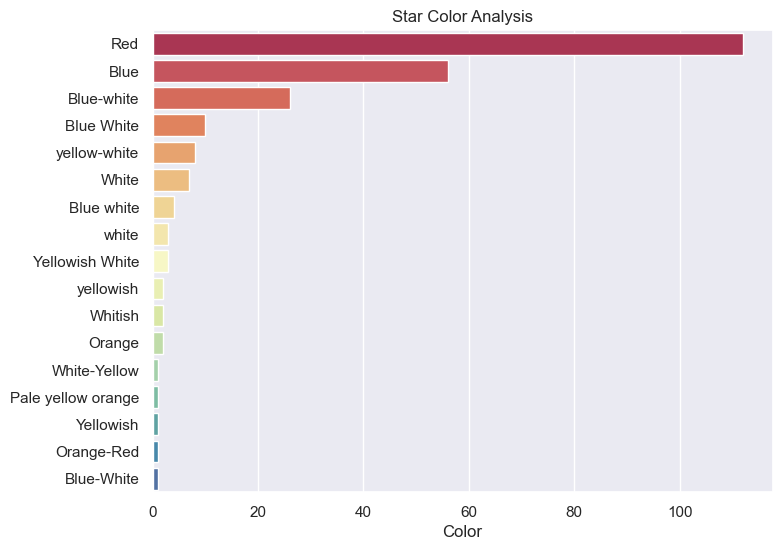

In [57]:
# Analyse the colour of the star
a = pd.DataFrame(data['Color'].value_counts())
plt.figure(figsize=(8,6))
sns.barplot(data=a, x='Color', y=a.index, palette='Spectral')
plt.title("Star Color Analysis")
plt.show()

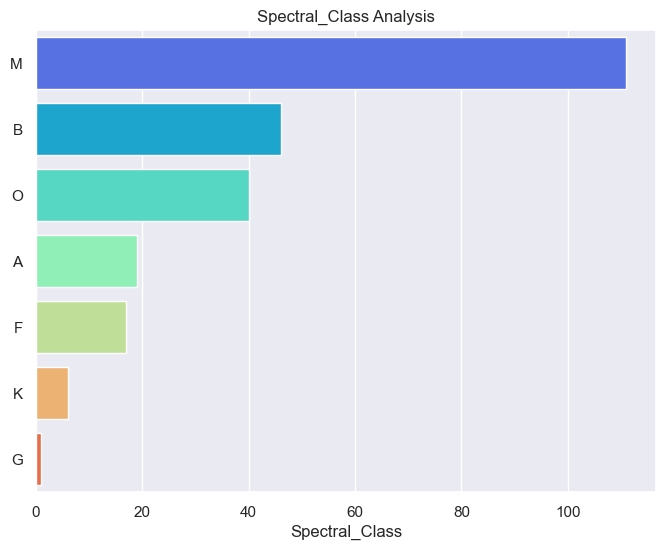

In [58]:
# Spectral_Class - analysis
a = pd.DataFrame(data['Spectral_Class'].value_counts())
plt.figure(figsize=(8,6))
sns.barplot(data=a, x='Spectral_Class', y=a.index, palette='rainbow')
plt.title("Spectral_Class Analysis")
plt.show()

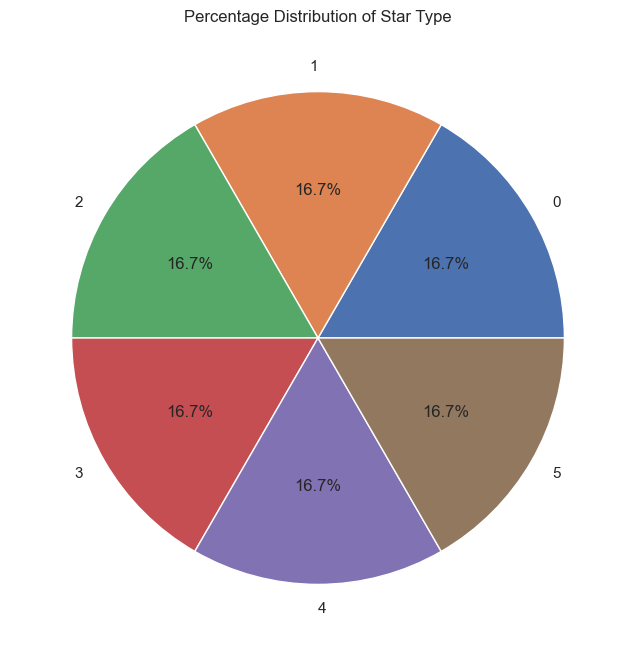

In [59]:
# Star Type Analysis
a = pd.DataFrame(data['Type'].value_counts())
plt.figure(figsize=(10,8))
plt.pie(data=a, x='Type',labels=a.index, autopct='%1.1f%%')
plt.title("Percentage Distribution of Star Type")
plt.show()

In [60]:
data['Type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Type, dtype: int64

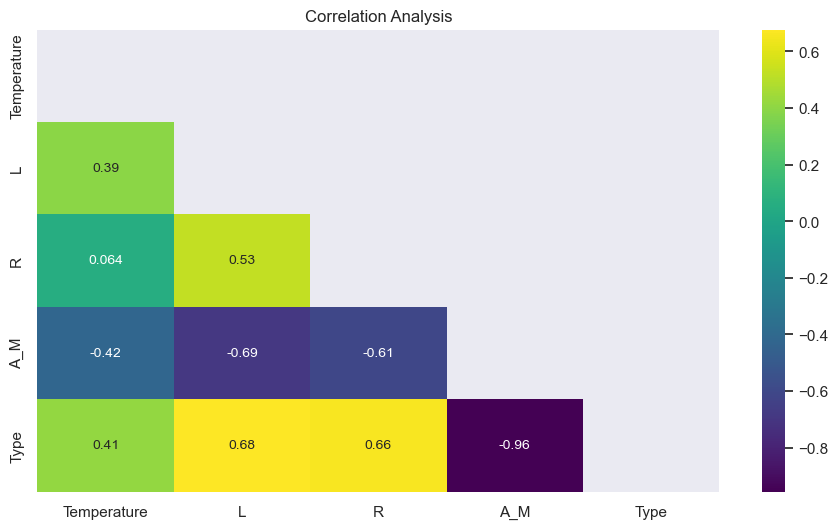

In [61]:
# Correlation Analysis 

matrix = data.corr()
mask = np.zeros_like(matrix, dtype=float)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(11,6))
sns.heatmap(matrix, annot=True, cmap='viridis', annot_kws={'size':10}, mask=mask)
plt.title("Correlation Analysis")
plt.show()

In [62]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [63]:
# Now, let us implement the label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Color_Label'] = label_encoder.fit_transform(data['Color'])
data['Spectral_Class_Label'] = label_encoder.fit_transform(data['Spectral_Class'])

In [64]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type,Color_Label,Spectral_Class_Label
0,3068,0.002400,0.1700,16.12,Red,M,0,8,5
1,3042,0.000500,0.1542,16.60,Red,M,0,8,5
2,2600,0.000300,0.1020,18.70,Red,M,0,8,5
3,2800,0.000200,0.1600,16.65,Red,M,0,8,5
4,1939,0.000138,0.1030,20.06,Red,M,0,8,5


In [65]:
print("Original Color")
print(data['Color'].unique())

print()

print("Labels")
print(data['Color_Label'].unique())

Original Color
['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']

Labels
[ 8  1  9 13  2  7  0  4 11 15  5 10 14 16 12  6  3]


In [66]:
print("Original Color")
print(data['Spectral_Class'].unique())

print()

print("Labels")
print(data['Spectral_Class_Label'].unique())

Original Color
['M' 'B' 'A' 'F' 'O' 'K' 'G']

Labels
[5 1 0 2 6 4 3]


In [67]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type,Color_Label,Spectral_Class_Label
0,3068,0.002400,0.1700,16.12,Red,M,0,8,5
1,3042,0.000500,0.1542,16.60,Red,M,0,8,5
2,2600,0.000300,0.1020,18.70,Red,M,0,8,5
3,2800,0.000200,0.1600,16.65,Red,M,0,8,5
4,1939,0.000138,0.1030,20.06,Red,M,0,8,5


In [68]:
# Split the data into x and y

y = data['Spectral_Class_Label'].values
x = data.drop(['Spectral_Class_Label', 'Color','Spectral_Class'], axis=1).values

In [69]:
x

array([[ 3.06800e+03,  2.40000e-03,  1.70000e-01,  1.61200e+01,
         0.00000e+00,  8.00000e+00],
       [ 3.04200e+03,  5.00000e-04,  1.54200e-01,  1.66000e+01,
         0.00000e+00,  8.00000e+00],
       [ 2.60000e+03,  3.00000e-04,  1.02000e-01,  1.87000e+01,
         0.00000e+00,  8.00000e+00],
       ...,
       [ 8.82900e+03,  5.37493e+05,  1.42300e+03, -1.07300e+01,
         5.00000e+00,  9.00000e+00],
       [ 9.23500e+03,  4.04940e+05,  1.11200e+03, -1.12300e+01,
         5.00000e+00,  9.00000e+00],
       [ 3.78820e+04,  2.94903e+05,  1.78300e+03, -7.80000e+00,
         5.00000e+00,  0.00000e+00]])

In [70]:
y

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 0,
       2, 0, 1, 2, 0, 2, 2, 2, 6, 1, 1, 1, 2, 0, 2, 2, 2, 2, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 0, 1, 1, 0, 1, 1,
       2, 1, 2, 4, 4, 4, 0, 0, 4, 2, 0, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       5, 5, 5, 5, 5, 5, 4, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 4, 1, 5, 5,
       6, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 6, 6, 0, 1, 1, 2,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 1, 1, 6, 6, 0, 0, 6])

In [71]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# Implementation of PCA

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X = pca.fit_transform(x)

In [73]:
print("PCA applied :")
print(pd.DataFrame(X).head())
print()
print("Original DataPoint :")
print(pd.DataFrame(x).head())


PCA applied :
          0         1         2         3         4         5
0 -2.110418  0.084632  0.529498  0.160523  0.122790 -0.259226
1 -2.133901  0.079289  0.546794  0.172436  0.131877 -0.227771
2 -2.247767  0.075481  0.632999  0.219490  0.148354 -0.089304
3 -2.144461  0.092991  0.556274  0.169977  0.115854 -0.223872
4 -2.334200  0.095366  0.700858  0.244203  0.132454  0.001340

Original DataPoint :
          0         1         2         3        4         5
0 -0.779382 -0.598624 -0.459210  1.116745 -1.46385  0.531788
1 -0.782110 -0.598624 -0.459241  1.162414 -1.46385  0.531788
2 -0.828477 -0.598624 -0.459342  1.362213 -1.46385  0.531788
3 -0.807496 -0.598624 -0.459229  1.167171 -1.46385  0.531788
4 -0.897819 -0.598624 -0.459340  1.491607 -1.46385  0.531788


# The explained variance ratio function in the PCA class returns the variance produced by each pricipal component

In [74]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.58015798, 0.23500814, 0.06856623, 0.0601706 , 0.04920672,
       0.00689033])

In [75]:
# PCA = 2 (0.58015798, 0.23500814)

In [76]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
X_2 = pca2.fit_transform(x)

In [77]:
pd.DataFrame(X_2).head()

,0,1
0,-2.110418,0.084632
1,-2.133901,0.079289
2,-2.247767,0.075481
3,-2.144461,0.092991
4,-2.334200,0.095366


In [78]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=101)

# RandomForest Classification Model

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train, y_train)
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [80]:
from sklearn.metrics import accuracy_score
print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print()
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Training Accuracy : 0.8125

Test Accuracy : 0.625


# PCA = 3

In [81]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=3)
X_3 = pca3.fit_transform(x)

In [82]:
pd.DataFrame(X_3).head()

,0,1,2
0,-2.110418,0.084632,0.529498
1,-2.133901,0.079289,0.546794
2,-2.247767,0.075481,0.632999
3,-2.144461,0.092991,0.556274
4,-2.334200,0.095366,0.700858


In [83]:
x_train, x_test, y_train, y_test = train_test_split(X_3, y, test_size=0.2, random_state=101)

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train, y_train)
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [85]:
from sklearn.metrics import accuracy_score
print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print()
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Training Accuracy : 0.8072916666666666

Test Accuracy : 0.625


# PCA 4

In [88]:
from sklearn.decomposition import PCA
pca4 = PCA(n_components=4)
X_4 = pca4.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_4, y, test_size=0.2, random_state=101)

In [89]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train, y_train)
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)
print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print()
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Training Accuracy : 0.8385416666666666

Test Accuracy : 0.7291666666666666


# PCA 5

In [90]:
from sklearn.decomposition import PCA
pca5 = PCA(n_components=5)
X_5 = pca5.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_5, y, test_size=0.2, random_state=101)

In [91]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train, y_train)
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)
print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print()
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Training Accuracy : 0.8177083333333334

Test Accuracy : 0.625


# Bank-data.csv

In [92]:
df = pd.read_csv('Bank-data.csv')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          518 non-null    int64  
 1   interest_rate  518 non-null    float64
 2   credit         518 non-null    int64  
 3   Gender         518 non-null    int64  
 4   previous       518 non-null    int64  
 5   duration       518 non-null    int64  
 6   Churn          518 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 28.5+ KB


In [94]:
df.head()

,Index,interest_rate,credit,Gender,previous,duration,Churn
0,0,1.334,0,1,0,117,no
1,1,0.767,0,0,1,274,yes
2,2,4.858,0,1,0,167,no
3,3,4.120,0,0,0,686,yes
4,4,4.856,0,1,0,159,no


In [95]:
df['Churn'] = df['Churn'].astype('category')
df['Churn'] = df['Churn'].cat.codes

In [96]:
df.head()

,Index,interest_rate,credit,Gender,previous,duration,Churn
0,0,1.334,0,1,0,117,0
1,1,0.767,0,0,1,274,1
2,2,4.858,0,1,0,167,0
3,3,4.120,0,0,0,686,1
4,4,4.856,0,1,0,159,0


In [97]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [99]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [100]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [101]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print()
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Training Accuracy : 1.0

Test Accuracy : 0.8846153846153846


# PCA 

In [102]:
pca = PCA(n_components=None)
x_train_n = pca.fit_transform(x_train)
x_test_n = pca.fit_transform(x_test)

In [103]:
pd.DataFrame(x_train_n).head()

,0,1,2,3,4,5
0,-294.835257,-113.378606,2.114530,-0.371513,0.645302,-0.076565
1,219.732069,172.265660,1.913736,-0.225068,-0.276208,-0.099893
2,-41.349478,-167.885036,2.013417,-0.239475,-0.345053,-0.054981
3,1407.574363,128.623392,-2.020259,-0.292144,0.007090,-0.021039
4,-110.936502,229.567085,-1.822691,0.620823,1.129124,-0.019383


In [104]:
pd.DataFrame(x_train).head()

,Index,interest_rate,credit,Gender,previous,duration
359,359,0.715,0,0,1,95
95,95,1.016,0,0,0,621
424,424,0.721,0,0,0,346
188,188,4.957,0,0,0,1806
24,24,4.865,0,1,1,293


In [105]:
explained_variance = pca.explained_variance_ratio_

In [106]:
explained_variance

array([7.65702635e-01, 2.34261423e-01, 3.32383998e-05, 1.82708272e-06,
       7.37117175e-07, 1.39028678e-07])

In [ ]:
# pca1 = 0.765702635
# pca2 = 0.234261423
# pca3 = 0.00003323839
# pca4 = 0.00000182708
# pca5 = 7.37117175e-7
# pca6 = 1.39028678e-7

# pca 1 and 2 = 99.9%

In [107]:
pca2 = PCA(n_components=2)
x_train2 = pca2.fit_transform(x_train)
x_test_2 = pca2.fit_transform(x_test)

In [109]:
rf1 = RandomForestClassifier()
rf1.fit(x_train2, y_train)

RandomForestClassifier()

In [111]:
y_pred_train1 = rf1.predict(x_train2)
y_pred_test1 = rf1.predict(x_test_2)

In [112]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train1))
print()
print("Test Accuracy :", accuracy_score(y_test, y_pred_test1))

Training Accuracy : 1.0

Test Accuracy : 0.6057692307692307
